In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
minimax_d1_d2 = pd.read_csv('minimax_d1_d2_self_play.csv')
minimax_d1_d3 = pd.read_csv('minimax_d1_d3_self_play.csv')
minimax_d2_d3 = pd.read_csv('minimax_d2_d3_self_play.csv')

mcts = pd.read_csv('mcts_self_play.csv')

In [3]:
def minimax_depth_graph(data, label1, label2):
    labels = minimax_d1_d2.id[:50]
    p1distance = data.p1distance[:50]
    p2distance = data.p2distance[:50]

    x = np.arange(len(labels))  # the label locations
    width = 0.4  # the width of the bars

    fig, ax = plt.subplots(figsize = [15,5])
    rects1 = ax.bar(x - width/2, p1distance, width, label=label1)
    rects2 = ax.bar(x + width/2, p2distance, width, label=label2)

    # Add some text for labels, title and custom x-axis tick labels.
    ax.set_ylabel('Distance from wining state')
    ax.set_xlabel('Experiment number')
    ax.set_title('minimax moves to win for search ' + label1 + ' and '+ label2)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    # declutter the x-axis labels
    every_nth = 2
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

    ax.legend(loc = 9)
    fig.tight_layout()
    
    return plt.show()

In [4]:
def stats(data):

    p1avg = data.p1distance.sum() / 50
    p2avg = data.p2distance.sum() / 50

    p1movesavg = data.p1moves.sum() / 50
    p2movesavg = data.p2moves.sum() / 50


    p1thinkingavg = data.p1thinkingtime.sum() / 50
    p2thinkingavg = data.p2thinkingtime.sum() / 50

    winrate = data['winner'].value_counts(normalize=True)

    print ("p1 avg:     " , p1avg, "avg moves: " , p1movesavg, " avg thinking: " , p1thinkingavg)
    print ("p2 avg:   " , p2avg, "avg moves: " , p2movesavg, " avg thinking: " , p2thinkingavg)
    
    print()
    print(winrate)

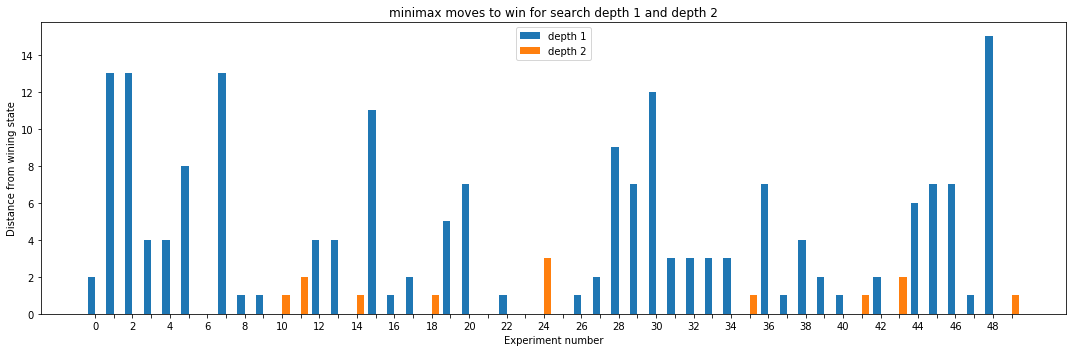

In [5]:
minimax_depth_graph(minimax_d1_d2, 'depth 1', 'depth 2')

In [6]:
stats(minimax_d1_d2)

p1 avg:      3.8 avg moves:  22.8  avg thinking:  0.0031200000000000004
p2 avg:    0.26 avg moves:  21.98  avg thinking:  0.10112000000000002

p2    0.82
p1    0.18
Name: winner, dtype: float64


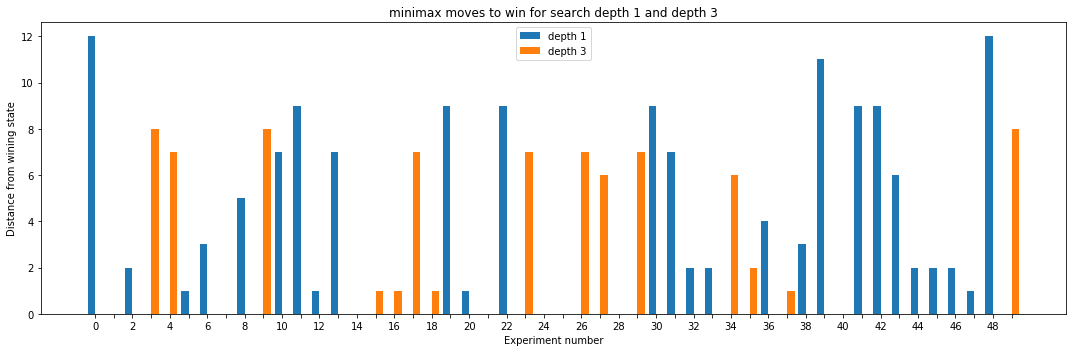

In [7]:
minimax_depth_graph(minimax_d1_d3, 'depth 1', 'depth 3')

In [8]:
stats(minimax_d1_d3)

p1 avg:      2.94 avg moves:  21.34  avg thinking:  0.0015800000000000002
p2 avg:    1.54 avg moves:  20.66  avg thinking:  2.05972

p2    0.68
p1    0.32
Name: winner, dtype: float64


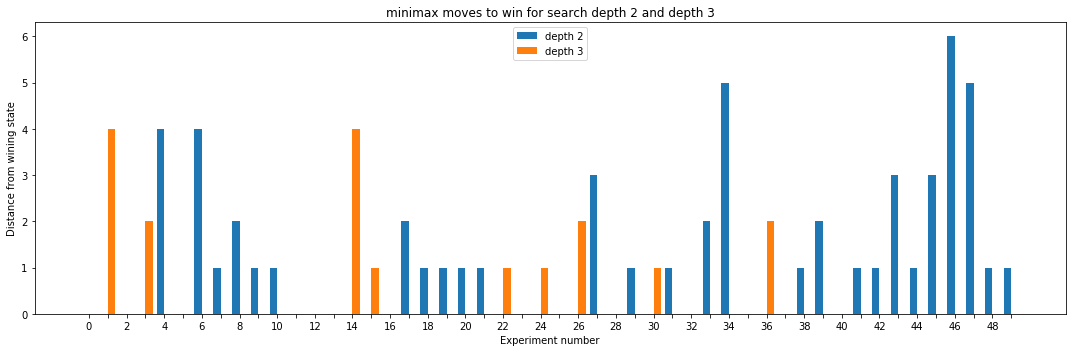

In [9]:
minimax_depth_graph(minimax_d2_d3, 'depth 2', 'depth 3')

In [10]:
stats(minimax_d2_d3)

p1 avg:      1.12 avg moves:  21.52  avg thinking:  1.62512
p2 avg:    0.36 avg moves:  20.8  avg thinking:  0.0443

p2    0.72
p1    0.28
Name: winner, dtype: float64


In [11]:
stats(mcts)

p1 avg:      0.34 avg moves:  63.52  avg thinking:  0.4745999999999999
p2 avg:    5.46 avg moves:  63.5  avg thinking:  1.10674

p1    0.96
p2    0.04
Name: winner, dtype: float64
